In [1]:
from skimage.metrics import structural_similarity as ssim
from skimage import data, img_as_float
from skimage.metrics import mean_squared_error
import math

def fun_PSNR(original, recovered):
    mse = np.mean((original - recovered) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = np.amax(original.ravel())**2
    PSNR = 10 * math.log10(PIXEL_MAX /mse)
    return PSNR



Text(0.5, 0, 'Receivers')

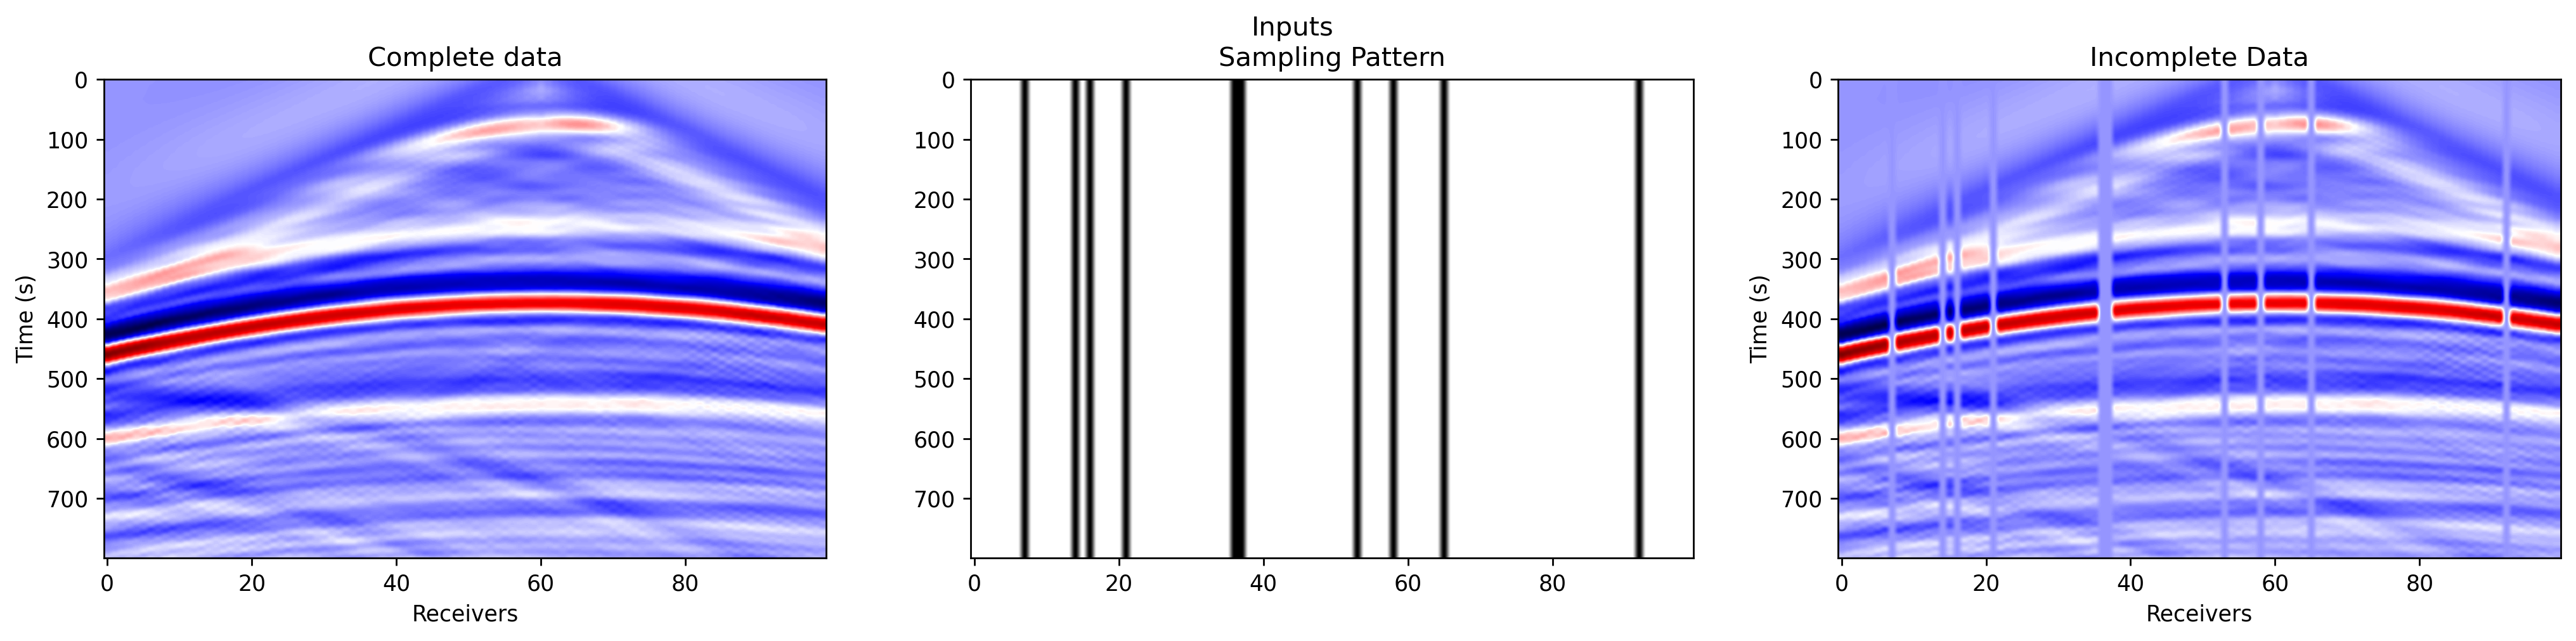

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import os

from Function import *
import scipy


x = np.load('data/data.npy')
x = x.T
maxiter = 500


'''
---------------  SAMPLING --------------------
'''
sr_rand = 0.1 # 1-compression
y_rand, pattern_rand, pattern_index= random_sampling(x,sr_rand)
H = pattern_index


# Sampling pattern
H0 = np.tile(pattern_rand.reshape(1,-1),(x.shape[0],1))


''' --------------Visualization ----------
'''
fig, axs = plt.subplots(1, 3,dpi=250,figsize=(20, 4))
fig.suptitle('Inputs')

axs[0].imshow(x, cmap='seismic', aspect='auto')
axs[0].set_title('Complete data')
axs[0].set_ylabel('Time (s)')
axs[0].set_xlabel('Receivers')

axs[1].imshow(H0, cmap ='gray',aspect='auto')
axs[1].set_title('Sampling Pattern')

axs[2].imshow(y_rand, cmap='seismic', aspect='auto')
axs[2].set_title('Incomplete Data')
axs[2].set_ylabel('Time (s)')
axs[2].set_xlabel('Receivers')


In [3]:
index = 5


case = 'FISTA' 

#----------------- FISTA --------------------
Alg = Algorithms(x, H , 'DCT2D', 'IDCT2D')
tau = 0.1
mu = 0.03
x_result_FISTA, hist = Alg.FISTA(tau, mu, maxiter)


 FISTA: 

itr 	 ||x-xold|| 	 PSNR 

1 	 Error: 1.0000e+00 	 PSNR: -14.227 dB 

2 	 Error: 4.9239e-01 	 PSNR: -6.909 dB 

3 	 Error: 3.7973e-01 	 PSNR: -2.199 dB 

4 	 Error: 3.0783e-01 	 PSNR: 1.413 dB 

5 	 Error: 2.5734e-01 	 PSNR: 4.414 dB 

6 	 Error: 2.1956e-01 	 PSNR: 7.025 dB 

7 	 Error: 1.8997e-01 	 PSNR: 9.368 dB 

8 	 Error: 1.6600e-01 	 PSNR: 11.513 dB 

9 	 Error: 1.4606e-01 	 PSNR: 13.505 dB 

10 	 Error: 1.2910e-01 	 PSNR: 15.369 dB 

11 	 Error: 1.1444e-01 	 PSNR: 17.119 dB 

12 	 Error: 1.0158e-01 	 PSNR: 18.755 dB 

13 	 Error: 9.0161e-02 	 PSNR: 20.267 dB 

14 	 Error: 7.9920e-02 	 PSNR: 21.639 dB 

15 	 Error: 7.0661e-02 	 PSNR: 22.846 dB 

16 	 Error: 6.2232e-02 	 PSNR: 23.869 dB 

17 	 Error: 5.4516e-02 	 PSNR: 24.695 dB 

18 	 Error: 4.7422e-02 	 PSNR: 25.328 dB 

19 	 Error: 4.0881e-02 	 PSNR: 25.789 dB 

20 	 Error: 3.4836e-02 	 PSNR: 26.108 dB 

21 	 Error: 2.9246e-02 	 PSNR: 26.320 dB 

22 	 Error: 2.4079e-02 	 PSNR: 26.456 dB 

23 	 Error: 1.9310e-02 	 PSNR:

207 	 Error: 1.0722e-03 	 PSNR: 47.367 dB 

208 	 Error: 1.0550e-03 	 PSNR: 47.355 dB 

209 	 Error: 1.0388e-03 	 PSNR: 47.347 dB 

210 	 Error: 1.0238e-03 	 PSNR: 47.343 dB 

211 	 Error: 1.0068e-03 	 PSNR: 47.343 dB 

212 	 Error: 9.9291e-04 	 PSNR: 47.347 dB 

213 	 Error: 9.8074e-04 	 PSNR: 47.355 dB 

214 	 Error: 9.7083e-04 	 PSNR: 47.367 dB 

215 	 Error: 9.5866e-04 	 PSNR: 47.385 dB 

216 	 Error: 9.4916e-04 	 PSNR: 47.407 dB 

217 	 Error: 9.4044e-04 	 PSNR: 47.433 dB 

218 	 Error: 9.3124e-04 	 PSNR: 47.464 dB 

219 	 Error: 9.2529e-04 	 PSNR: 47.499 dB 

220 	 Error: 9.1993e-04 	 PSNR: 47.537 dB 

221 	 Error: 9.1425e-04 	 PSNR: 47.580 dB 

222 	 Error: 9.0791e-04 	 PSNR: 47.627 dB 

223 	 Error: 9.0205e-04 	 PSNR: 47.677 dB 

224 	 Error: 8.9691e-04 	 PSNR: 47.732 dB 

225 	 Error: 8.9392e-04 	 PSNR: 47.791 dB 

226 	 Error: 8.9458e-04 	 PSNR: 47.853 dB 

227 	 Error: 8.9597e-04 	 PSNR: 47.919 dB 

228 	 Error: 8.9773e-04 	 PSNR: 47.988 dB 

229 	 Error: 8.9899e-04 	 PSNR: 

411 	 Error: 1.2101e-04 	 PSNR: 50.712 dB 

412 	 Error: 1.2029e-04 	 PSNR: 50.712 dB 

413 	 Error: 1.2011e-04 	 PSNR: 50.712 dB 

414 	 Error: 1.1997e-04 	 PSNR: 50.712 dB 

415 	 Error: 1.1963e-04 	 PSNR: 50.711 dB 

416 	 Error: 1.1832e-04 	 PSNR: 50.711 dB 

417 	 Error: 1.1642e-04 	 PSNR: 50.710 dB 

418 	 Error: 1.1448e-04 	 PSNR: 50.709 dB 

419 	 Error: 1.1312e-04 	 PSNR: 50.708 dB 

420 	 Error: 1.1149e-04 	 PSNR: 50.707 dB 

421 	 Error: 1.0875e-04 	 PSNR: 50.705 dB 

422 	 Error: 1.0597e-04 	 PSNR: 50.704 dB 

423 	 Error: 1.0317e-04 	 PSNR: 50.702 dB 

424 	 Error: 1.0066e-04 	 PSNR: 50.701 dB 

425 	 Error: 9.8087e-05 	 PSNR: 50.699 dB 

426 	 Error: 9.5466e-05 	 PSNR: 50.697 dB 

427 	 Error: 9.2973e-05 	 PSNR: 50.696 dB 

428 	 Error: 9.0828e-05 	 PSNR: 50.694 dB 

429 	 Error: 8.8689e-05 	 PSNR: 50.692 dB 

430 	 Error: 8.6750e-05 	 PSNR: 50.691 dB 

431 	 Error: 8.4901e-05 	 PSNR: 50.689 dB 

432 	 Error: 8.3554e-05 	 PSNR: 50.688 dB 

433 	 Error: 8.2231e-05 	 PSNR: 

Text(0.5, 0, '# Iterations')

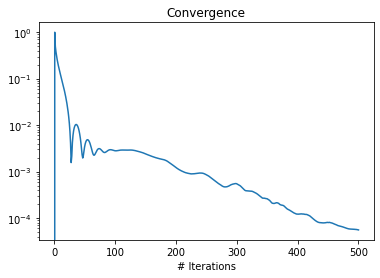

In [4]:

plt.plot(hist[:,0])
plt.yscale('log')
plt.title('Convergence')
plt.xlabel('# Iterations')

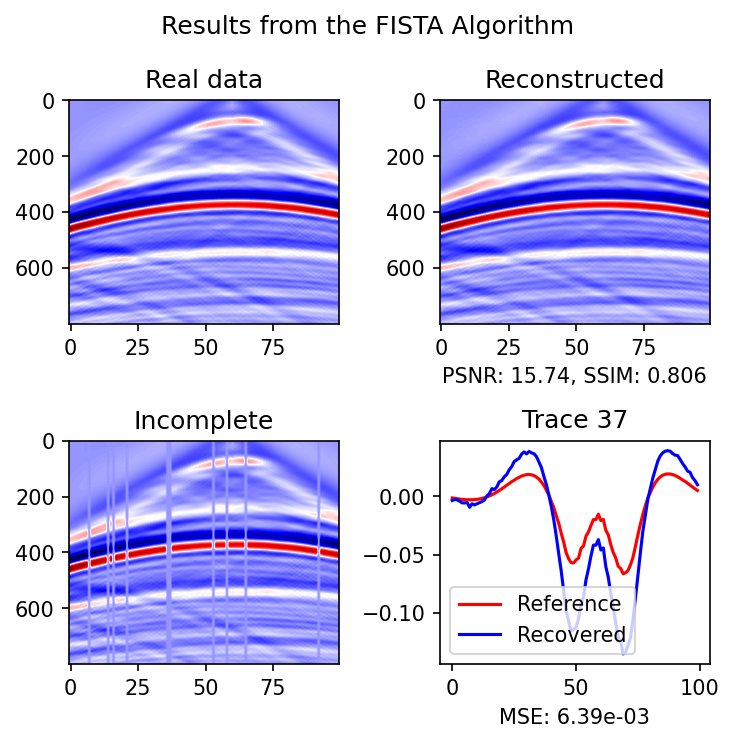

In [5]:
temp = np.asarray(range(0, pattern_rand.shape[0]))
pattern_rand_b2 = np.asarray(pattern_rand, dtype=bool) == 0
H_elim = temp[pattern_rand_b2]


fig, axs = plt.subplots(2, 2,dpi=150,figsize=(5, 5))
fig.suptitle('Results from the ' + case + ' Algorithm')

axs[0, 0].imshow(x, cmap='seismic', aspect='auto')
axs[0, 0].set_title('Real data')

axs[1, 0].imshow(y_rand, cmap='seismic', aspect='auto')
axs[1, 0].set_title('Incomplete')

# axs[1, 0].sharex(axs[0, 0])

axs[0, 1].imshow(x_result_FISTA, cmap='seismic', aspect='auto')
axs[0, 1].set_title('Reconstructed')
axs[0, 1].set_xlabel(f'PSNR: {fun_PSNR(x,x_result_FISTA):.2f}, SSIM: {ssim(x,x_result_FISTA):.3f}')


axs[1, 1].plot(x [H_elim[index], :], 'r', label='Reference')
axs[1, 1].plot(x_result_FISTA [H_elim[index], :], 'b', label='Recovered')
axs[1, 1].legend(loc='best')
plt.title('Trace ' + str("{:.0f}".format(H_elim[index])))
axs[1, 1].set_xlabel(f'MSE: {mean_squared_error(x,x_result_FISTA):.2e}')


fig.tight_layout()
plt.show()

In [6]:
x = np.load('data/data.npy')
x = x.T

case = 'GAP' 

# ------------------GAP--------------
Alg = Algorithms(x,H, 'DCT2D', 'IDCT2D')
tau = 1e-0
x_result_GAP, hist = Alg.GAP(tau, maxiter) # inputs: tau, maxiter





---------GAP method---------- 

itr 	 ||x-xold|| 	 PSNR 

1 	 Error: 1.0000e+00 	 PSNR: 25.868 dB 

2 	 Error: 2.0570e-03 	 PSNR: 25.906 dB 

3 	 Error: 2.0039e-03 	 PSNR: 25.944 dB 

4 	 Error: 1.9629e-03 	 PSNR: 25.982 dB 

5 	 Error: 1.9285e-03 	 PSNR: 26.019 dB 

6 	 Error: 1.8969e-03 	 PSNR: 26.056 dB 

7 	 Error: 1.8679e-03 	 PSNR: 26.093 dB 

8 	 Error: 1.8415e-03 	 PSNR: 26.129 dB 

9 	 Error: 1.8174e-03 	 PSNR: 26.166 dB 

10 	 Error: 1.7958e-03 	 PSNR: 26.202 dB 

11 	 Error: 1.7759e-03 	 PSNR: 26.239 dB 

12 	 Error: 1.7576e-03 	 PSNR: 26.276 dB 

13 	 Error: 1.7382e-03 	 PSNR: 26.313 dB 

14 	 Error: 1.7178e-03 	 PSNR: 26.350 dB 

15 	 Error: 1.6997e-03 	 PSNR: 26.386 dB 

16 	 Error: 1.6831e-03 	 PSNR: 26.423 dB 

17 	 Error: 1.6680e-03 	 PSNR: 26.459 dB 

18 	 Error: 1.6527e-03 	 PSNR: 26.496 dB 

19 	 Error: 1.6374e-03 	 PSNR: 26.532 dB 

20 	 Error: 1.6212e-03 	 PSNR: 26.569 dB 

21 	 Error: 1.6053e-03 	 PSNR: 26.605 dB 

22 	 Error: 1.5892e-03 	 PSNR: 26.641 dB 

23 	 

219 	 Error: 7.7022e-04 	 PSNR: 35.267 dB 

220 	 Error: 7.6661e-04 	 PSNR: 35.321 dB 

221 	 Error: 7.6273e-04 	 PSNR: 35.374 dB 

222 	 Error: 7.5884e-04 	 PSNR: 35.428 dB 

223 	 Error: 7.5556e-04 	 PSNR: 35.482 dB 

224 	 Error: 7.5269e-04 	 PSNR: 35.536 dB 

225 	 Error: 7.4916e-04 	 PSNR: 35.589 dB 

226 	 Error: 7.4539e-04 	 PSNR: 35.643 dB 

227 	 Error: 7.4130e-04 	 PSNR: 35.697 dB 

228 	 Error: 7.3714e-04 	 PSNR: 35.751 dB 

229 	 Error: 7.3345e-04 	 PSNR: 35.805 dB 

230 	 Error: 7.2963e-04 	 PSNR: 35.860 dB 

231 	 Error: 7.2591e-04 	 PSNR: 35.914 dB 

232 	 Error: 7.2272e-04 	 PSNR: 35.968 dB 

233 	 Error: 7.2004e-04 	 PSNR: 36.023 dB 

234 	 Error: 7.1792e-04 	 PSNR: 36.077 dB 

235 	 Error: 7.1499e-04 	 PSNR: 36.132 dB 

236 	 Error: 7.1153e-04 	 PSNR: 36.187 dB 

237 	 Error: 7.0744e-04 	 PSNR: 36.242 dB 

238 	 Error: 7.0255e-04 	 PSNR: 36.297 dB 

239 	 Error: 6.9664e-04 	 PSNR: 36.351 dB 

240 	 Error: 6.8961e-04 	 PSNR: 36.406 dB 

241 	 Error: 6.8328e-04 	 PSNR: 

439 	 Error: 2.3923e-04 	 PSNR: 50.416 dB 

440 	 Error: 2.3587e-04 	 PSNR: 50.485 dB 

441 	 Error: 2.3195e-04 	 PSNR: 50.553 dB 

442 	 Error: 2.2741e-04 	 PSNR: 50.619 dB 

443 	 Error: 2.2309e-04 	 PSNR: 50.685 dB 

444 	 Error: 2.1909e-04 	 PSNR: 50.749 dB 

445 	 Error: 2.1555e-04 	 PSNR: 50.812 dB 

446 	 Error: 2.1273e-04 	 PSNR: 50.874 dB 

447 	 Error: 2.1041e-04 	 PSNR: 50.935 dB 

448 	 Error: 2.0781e-04 	 PSNR: 50.996 dB 

449 	 Error: 2.0494e-04 	 PSNR: 51.055 dB 

450 	 Error: 2.0153e-04 	 PSNR: 51.113 dB 

451 	 Error: 1.9800e-04 	 PSNR: 51.169 dB 

452 	 Error: 1.9479e-04 	 PSNR: 51.225 dB 

453 	 Error: 1.9234e-04 	 PSNR: 51.280 dB 

454 	 Error: 1.9016e-04 	 PSNR: 51.334 dB 

455 	 Error: 1.8804e-04 	 PSNR: 51.387 dB 

456 	 Error: 1.8603e-04 	 PSNR: 51.439 dB 

457 	 Error: 1.8411e-04 	 PSNR: 51.489 dB 

458 	 Error: 1.8203e-04 	 PSNR: 51.539 dB 

459 	 Error: 1.7994e-04 	 PSNR: 51.588 dB 

460 	 Error: 1.7793e-04 	 PSNR: 51.636 dB 

461 	 Error: 1.7575e-04 	 PSNR: 

Text(0.5, 0, '# Iterations')

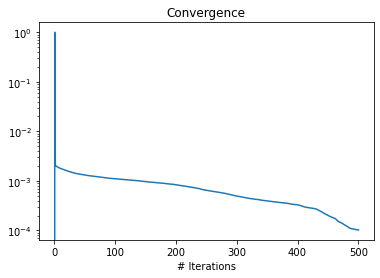

In [7]:
plt.plot(hist[:,0])
plt.yscale('log')
plt.title('Convergence')
plt.xlabel('# Iterations')

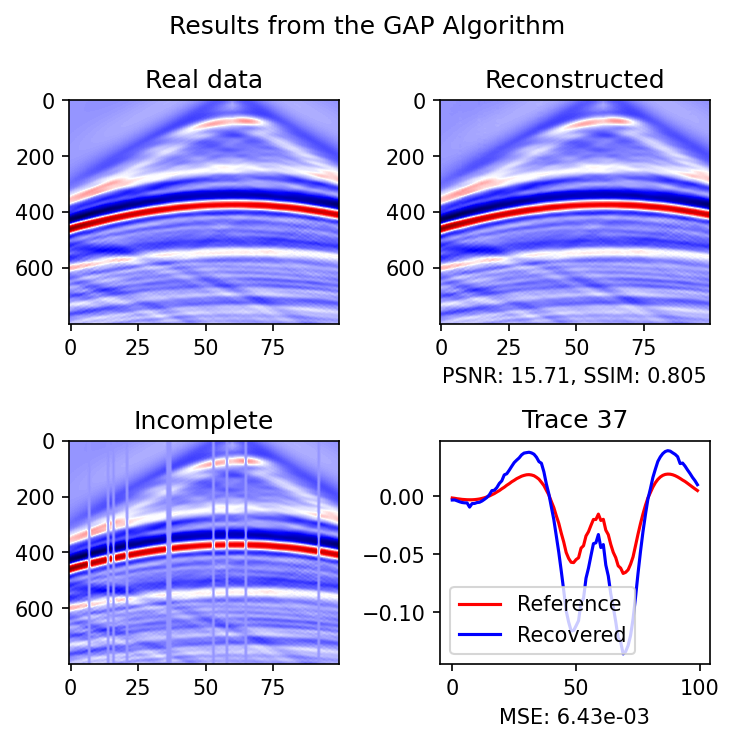

In [8]:
temp = np.asarray(range(0, pattern_rand.shape[0]))
pattern_rand_b2 = np.asarray(pattern_rand, dtype=bool) == 0
H_elim = temp[pattern_rand_b2]


fig, axs = plt.subplots(2, 2,dpi=150,figsize=(5, 5))
fig.suptitle('Results from the ' + case + ' Algorithm')

axs[0, 0].imshow(x, cmap='seismic', aspect='auto')
axs[0, 0].set_title('Real data')

axs[1, 0].imshow(y_rand, cmap='seismic', aspect='auto')
axs[1, 0].set_title('Incomplete')

# axs[1, 0].sharex(axs[0, 0])

axs[0, 1].imshow(x_result_GAP, cmap='seismic', aspect='auto')
axs[0, 1].set_title('Reconstructed')
axs[0, 1].set_xlabel(f'PSNR: {fun_PSNR(x,x_result_GAP):.2f}, SSIM: {ssim(x,x_result_GAP):.3f}')


axs[1, 1].plot(x [H_elim[index], :], 'r', label='Reference')
axs[1, 1].plot(x_result_GAP [H_elim[index], :], 'b', label='Recovered')
axs[1, 1].legend(loc='best')
plt.title('Trace ' + str("{:.0f}".format(H_elim[index])))
axs[1, 1].set_xlabel(f'MSE: {mean_squared_error(x,x_result_GAP):.2e}')


fig.tight_layout()
plt.show()


In [9]:
case = 'TWIST' 
# x = np.load('data/data.npy')

# ------------------TwIST--------------
Alg = Algorithms(x,H, 'DCT2D', 'IDCT2D')
# default parameters
alpha = 1.2
beta  = 1.998
tau = 0.9

x_result_TWIST, hist = Alg.TwIST(tau, alpha, beta, maxiter)



---------TwIST method---------- 

itr 	 ||x-xold|| 	 PSNR 

1 	 Error: 1.0000e+00 	 PSNR: 22.082 dB 

2 	 Error: 3.9469e+00 	 PSNR: 11.920 dB 

3 	 Error: 6.8366e-01 	 PSNR: 25.928 dB 

4 	 Error: 4.1963e-01 	 PSNR: 24.820 dB 

5 	 Error: 1.2369e-01 	 PSNR: 26.423 dB 

6 	 Error: 2.5776e-02 	 PSNR: 26.311 dB 

7 	 Error: 6.1691e-03 	 PSNR: 26.349 dB 

8 	 Error: 9.8732e-03 	 PSNR: 26.511 dB 

9 	 Error: 7.1410e-03 	 PSNR: 26.539 dB 

10 	 Error: 4.9038e-03 	 PSNR: 26.648 dB 

11 	 Error: 3.7375e-03 	 PSNR: 26.719 dB 

12 	 Error: 3.5163e-03 	 PSNR: 26.805 dB 

13 	 Error: 3.4025e-03 	 PSNR: 26.887 dB 

14 	 Error: 3.3409e-03 	 PSNR: 26.969 dB 

15 	 Error: 3.2865e-03 	 PSNR: 27.052 dB 

16 	 Error: 3.2338e-03 	 PSNR: 27.134 dB 

17 	 Error: 3.1857e-03 	 PSNR: 27.217 dB 

18 	 Error: 3.1456e-03 	 PSNR: 27.299 dB 

19 	 Error: 3.1002e-03 	 PSNR: 27.383 dB 

20 	 Error: 3.0648e-03 	 PSNR: 27.467 dB 

21 	 Error: 3.0344e-03 	 PSNR: 27.550 dB 

22 	 Error: 3.0006e-03 	 PSNR: 27.634 dB 

23 

207 	 Error: 3.7867e-04 	 PSNR: 51.912 dB 

208 	 Error: 3.4861e-04 	 PSNR: 52.001 dB 

209 	 Error: 3.3381e-04 	 PSNR: 52.086 dB 

210 	 Error: 3.2431e-04 	 PSNR: 52.167 dB 

211 	 Error: 3.1657e-04 	 PSNR: 52.243 dB 

212 	 Error: 3.0085e-04 	 PSNR: 52.314 dB 

213 	 Error: 2.8824e-04 	 PSNR: 52.382 dB 

214 	 Error: 2.8012e-04 	 PSNR: 52.445 dB 

215 	 Error: 2.6997e-04 	 PSNR: 52.503 dB 

216 	 Error: 2.5598e-04 	 PSNR: 52.556 dB 

217 	 Error: 2.4700e-04 	 PSNR: 52.605 dB 

218 	 Error: 2.4335e-04 	 PSNR: 52.651 dB 

219 	 Error: 2.4042e-04 	 PSNR: 52.695 dB 

220 	 Error: 2.3730e-04 	 PSNR: 52.736 dB 

221 	 Error: 2.3495e-04 	 PSNR: 52.774 dB 

222 	 Error: 2.3256e-04 	 PSNR: 52.810 dB 

223 	 Error: 2.3056e-04 	 PSNR: 52.843 dB 

224 	 Error: 2.2920e-04 	 PSNR: 52.874 dB 

225 	 Error: 2.2788e-04 	 PSNR: 52.902 dB 

226 	 Error: 2.2680e-04 	 PSNR: 52.928 dB 

227 	 Error: 2.2329e-04 	 PSNR: 52.951 dB 

228 	 Error: 2.1586e-04 	 PSNR: 52.972 dB 

229 	 Error: 2.0337e-04 	 PSNR: 

409 	 Error: 1.8818e-06 	 PSNR: 53.086 dB 

410 	 Error: 1.8666e-06 	 PSNR: 53.086 dB 

411 	 Error: 1.8516e-06 	 PSNR: 53.086 dB 

412 	 Error: 1.8368e-06 	 PSNR: 53.086 dB 

413 	 Error: 1.8220e-06 	 PSNR: 53.086 dB 

414 	 Error: 1.8075e-06 	 PSNR: 53.086 dB 

415 	 Error: 1.7930e-06 	 PSNR: 53.086 dB 

416 	 Error: 1.7787e-06 	 PSNR: 53.086 dB 

417 	 Error: 1.7645e-06 	 PSNR: 53.086 dB 

418 	 Error: 1.7505e-06 	 PSNR: 53.086 dB 

419 	 Error: 1.7366e-06 	 PSNR: 53.086 dB 

420 	 Error: 1.7227e-06 	 PSNR: 53.086 dB 

421 	 Error: 1.7090e-06 	 PSNR: 53.086 dB 

422 	 Error: 1.6954e-06 	 PSNR: 53.086 dB 

423 	 Error: 1.6820e-06 	 PSNR: 53.086 dB 

424 	 Error: 1.6686e-06 	 PSNR: 53.086 dB 

425 	 Error: 1.6555e-06 	 PSNR: 53.086 dB 

426 	 Error: 1.6424e-06 	 PSNR: 53.086 dB 

427 	 Error: 1.6295e-06 	 PSNR: 53.086 dB 

428 	 Error: 1.6167e-06 	 PSNR: 53.086 dB 

429 	 Error: 1.6040e-06 	 PSNR: 53.086 dB 

430 	 Error: 1.5914e-06 	 PSNR: 53.086 dB 

431 	 Error: 1.5789e-06 	 PSNR: 

Text(0.5, 0, '# Iterations')

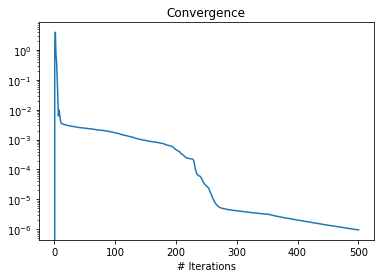

In [10]:
plt.plot(hist[:,0])
plt.yscale('log')
plt.title('Convergence')
plt.xlabel('# Iterations')


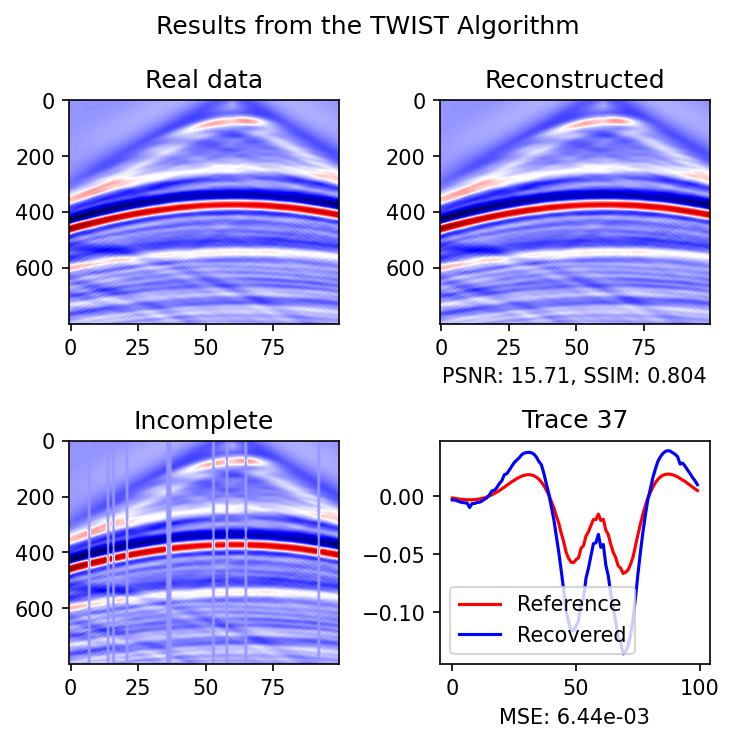

In [11]:
#-------------- Visualization ----------------
temp = np.asarray(range(0, pattern_rand.shape[0]))
pattern_rand_b2 = np.asarray(pattern_rand, dtype=bool) == 0
H_elim = temp[pattern_rand_b2]


fig, axs = plt.subplots(2, 2,dpi=150,figsize=(5, 5))
fig.suptitle('Results from the ' + case + ' Algorithm')

axs[0, 0].imshow(x, cmap='seismic', aspect='auto')
axs[0, 0].set_title('Real data')

axs[1, 0].imshow(y_rand, cmap='seismic', aspect='auto')
axs[1, 0].set_title('Incomplete')

# axs[1, 0].sharex(axs[0, 0])

axs[0, 1].imshow(x_result_TWIST, cmap='seismic', aspect='auto')
axs[0, 1].set_title('Reconstructed')
axs[0, 1].set_xlabel(f'PSNR: {fun_PSNR(x,x_result_TWIST):.2f}, SSIM: {ssim(x,x_result_TWIST):.3f}')


axs[1, 1].plot(x [H_elim[index], :], 'r', label='Reference')
axs[1, 1].plot(x_result_TWIST [H_elim[index], :], 'b', label='Recovered')
axs[1, 1].legend(loc='best')
plt.title('Trace ' + str("{:.0f}".format(H_elim[index])))
axs[1, 1].set_xlabel(f'MSE: {mean_squared_error(x,x_result_TWIST):.2e}')


fig.tight_layout()
plt.show()

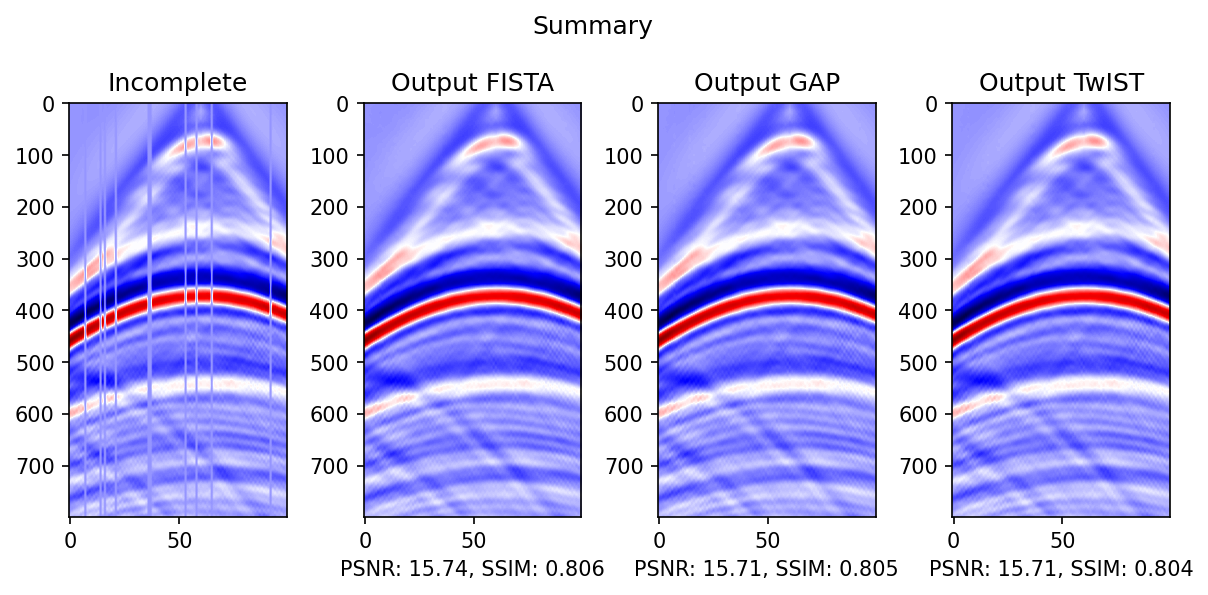

In [12]:
#-------------- Visualization ----------------
temp = np.asarray(range(0, pattern_rand.shape[0]))
pattern_rand_b2 = np.asarray(pattern_rand, dtype=bool) == 0
H_elim = temp[pattern_rand_b2]


fig, axs = plt.subplots(1,4,dpi=150,figsize=(8, 4))
fig.suptitle('Summary')

axs[0].imshow(y_rand, cmap='seismic', aspect='auto')
axs[0].set_title('Incomplete')

axs[1].imshow(x_result_FISTA, cmap='seismic', aspect='auto')
axs[1].set_title('Output FISTA')
axs[1].set_xlabel(f'PSNR: {fun_PSNR(x,x_result_FISTA):.2f}, SSIM: {ssim(x,x_result_FISTA):.3f}')


axs[2].imshow(x_result_GAP, cmap='seismic', aspect='auto')
axs[2].set_title('Output GAP')
axs[2].set_xlabel(f'PSNR: {fun_PSNR(x,x_result_GAP):.2f}, SSIM: {ssim(x,x_result_GAP):.3f}')


axs[3].imshow(x_result_TWIST, cmap='seismic', aspect='auto')
axs[3].set_title('Output TwIST')
axs[3].set_xlabel(f'PSNR: {fun_PSNR(x,x_result_TWIST):.2f}, SSIM: {ssim(x,x_result_TWIST):.3f}')




fig.tight_layout()
plt.show()